In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv('clean_unique_tweets.csv')

In [3]:
pd.set_option('display.max_colwidth', -1)
tweets.head()

,tweet
0,true true instagram instagramdown facebookdown
1,how to prepare yourself for social media outage how can you make sure your social media strategy is sustainable check out our guest post on getanewsletter s blog find out how to use social media to collect email subscribers facebookdown instagramdown
2,when facebookdown facebookoutage instagramblackout instagramdown listening to uptight everything s alright by stevie wonder on
3,facebookdown and instagramdown make me contemplate life so much teenagers nowadays spend more than hours each day on social network while they can spend that time educating themselves about crypto blockchain and what project can generate like bcnex bigbom zerobank
4,facebook instagram and whatsapp hit by major outage facebookdown instagramdown whatsappdown worldnews


In [35]:
from textblob import TextBlob

In [5]:
tweets['sentiment'] = tweets['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
tweets.head()

,tweet,sentiment
0,true true instagram instagramdown facebookdown,0.350000
1,how to prepare yourself for social media outage how can you make sure your social media strategy is sustainable check out our guest post on getanewsletter s blog find out how to use social media to collect email subscribers facebookdown instagramdown,0.150000
2,when facebookdown facebookoutage instagramblackout instagramdown listening to uptight everything s alright by stevie wonder on,0.000000
3,facebookdown and instagramdown make me contemplate life so much teenagers nowadays spend more than hours each day on social network while they can spend that time educating themselves about crypto blockchain and what project can generate like bcnex bigbom zerobank,0.244444
4,facebook instagram and whatsapp hit by major outage facebookdown instagramdown whatsappdown worldnews,0.062500


In [6]:
print('{0:.2f} % Positive tweets'.format(len(tweets[tweets['sentiment']>0]['tweet'])/(len(tweets))*100))

37.10 % Positive tweets


In [7]:
print('{0:.2f} % Negative tweets'.format(len(tweets[tweets['sentiment']<0]['tweet'])/(len(tweets))*100))

26.22 % Negative tweets


In [8]:
print('{0:.2f} % Neutral tweets'.format(len(tweets[tweets['sentiment']==0]['tweet'])/(len(tweets))*100))

36.68 % Neutral tweets


# Some of the most positive tweets

In [12]:
tweets[tweets['sentiment']==tweets['sentiment'].max()].head()

,tweet,sentiment
56,pastors everywhere realizing facebookdown and instagramdown will be added to their sunday sermons as a perfect illustration on idolatry,1.0
163,nick clegg is the best evidence of someone lying on their cv to get a job instagramdown instagramblackout facebookdown facebookoutage,1.0
250,congrats to twitter and myspace having the best day ever yesterday facebookdown instagramdown,1.0
634,unsignedmusic musicians instagramdown facebookdown newmusicalert if you could use some guaranteed exposure on on jjkaneallnewmusicshow showcasing the best artists newrelease click link to be on radio rotation kane fm myshow,1.0
736,reality instagramdown instadown instagram instagramisdown instagramnotworking instagramblackout instagramoutage instagramdown facebookdown instamodel instagood instaseleb instastories instastory awesome and feelinggood being around when it happened,1.0


# Some of the most negative tweets

In [13]:
tweets[tweets['sentiment']==tweets['sentiment'].min()].head()

,tweet,sentiment
370,worst intros via daemonxmachina instagramdown facebookdown rrrpressmeet bombcyclone instagramnotworking mar affordablehomes badgertough,-1.0
428,worst service provider d h ramcharan rrrmovie facebookdown instagramdown rrrpressmeet aamirkhan ajaydevgan ajaydevgn aliabhatt,-1.0
621,billions of people around the world have been affected by the worst outage in facebook s history facebookdown instagramdown news,-1.0
910,facebook and its family of apps suffered the worst outage in years facebookdown facebookoutage instagramdown whatsappdown,-1.0
1010,mark zuckerberg owned facebook whatsapp and instagram s suffer worst outage ever facebookdown instagramdown whatsappdown,-1.0


# Distribution of tweets' sentiments

In [31]:
bin = [-1,-0.5,-0.1,0.1,0.5,1]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(tweets['sentiment'],bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
df_new = pd.concat([tweets['sentiment'],category],axis = 1)

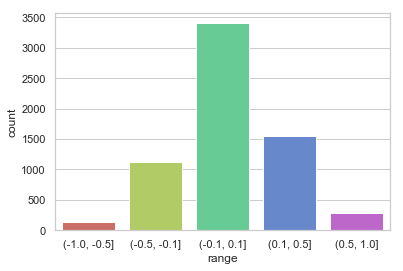

In [32]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
 
#draw histogram plot
sns.countplot(x = 'range', data = df_new, palette = 'hls')

#### People strangely seem to be having much of a positive attitude toward the Facebook and Instagram being down

In [35]:
tweets_time = pd.read_csv('clean_tweets.csv',index_col=0)

In [37]:
tweets_time.head(1)

,timestamp,tweet_text,username,all_hashtags
0,2019-03-14 16:27:07,true true instagram instagramdown facebookdown,bklyn_hayshun,"['Instagram', 'Instagramdown', 'Facebookdown']"


In [39]:
tweets_time.dtypes

timestamp       object
tweet_text      object
username        object
all_hashtags    object
dtype: object

In [44]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

In [51]:
tweets_time = pd.read_csv('clean_tweets.csv', parse_dates=['timestamp'], index_col='timestamp',date_parser=dateparse)

In [54]:
tweets_time.head(1)

,Unnamed: 0,tweet_text,username,all_hashtags
timestamp,,,,
2019-03-14 16:27:07,0,true true instagram instagramdown facebookdown,bklyn_hayshun,"['Instagram', 'Instagramdown', 'Facebookdown']"


In [61]:
tweets_time.index

DatetimeIndex(['2019-03-14 16:27:07', '2019-03-14 16:26:46',
               '2019-03-14 16:25:41', '2019-03-14 16:24:50',
               '2019-03-14 16:24:01', '2019-03-14 16:23:07',
               '2019-03-14 16:22:07', '2019-03-14 16:21:25',
               '2019-03-14 16:21:03', '2019-03-14 16:20:23',
               ...
               '2019-03-14 19:09:30', '2019-03-14 19:05:04',
               '2019-03-14 19:00:59', '2019-03-14 19:00:54',
               '2019-03-14 19:00:29', '2019-03-14 19:00:17',
               '2019-03-14 18:51:03', '2019-03-14 18:44:36',
               '2019-03-14 18:42:52', '2019-03-14 18:37:35'],
              dtype='datetime64[ns]', name='timestamp', length=446745, freq=None)

In [62]:
tweets_time=tweets_time['username']

In [63]:
tweets_time.head()

timestamp
2019-03-14 16:27:07    bklyn_hayshun
2019-03-14 16:26:46    Postfity     
2019-03-14 16:25:41    NikeMC       
2019-03-14 16:24:50    ftchkn       
2019-03-14 16:24:01    DailyMulligan
Name: username, dtype: object

In [65]:
tweets_time.sort_index(inplace=True)

In [66]:
tweets_time.head()

timestamp
2019-03-14 05:32:42    Amazingrenes03
2019-03-14 05:32:57    Faith28615108 
2019-03-14 05:33:05    ColferetteTS  
2019-03-14 05:33:05    ColferetteTS  
2019-03-14 05:33:27    bombandbossy  
Name: username, dtype: object

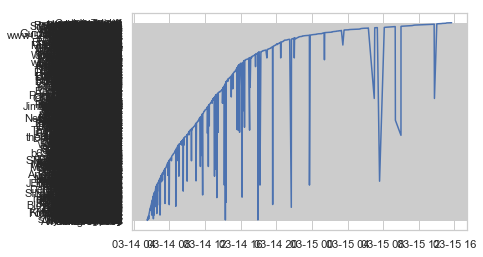

In [69]:
plt.plot(tweets_time)

In [76]:
ts = pd.Series(tweets_time.index.values)

In [73]:
ts = pd.Series(index=tweets_time.index.values)

In [79]:
ts.head()

0   2019-03-14 05:32:42
1   2019-03-14 05:32:57
2   2019-03-14 05:33:05
3   2019-03-14 05:33:05
4   2019-03-14 05:33:27
dtype: datetime64[ns]

In [86]:
ts[-1:]

446744   2019-03-15 15:40:55
dtype: datetime64[ns]

In [87]:
print('Repartition of tweets from {} to {}'.format(ts[0],ts[-1:]))

Repartition of tweets from 2019-03-14 05:32:42 to 446744   2019-03-15 15:40:55
dtype: datetime64[ns]


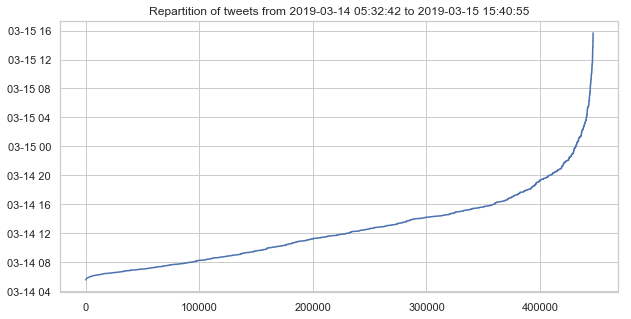

In [91]:
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Repartition of tweets from 2019-03-14 05:32:42 to 2019-03-15 15:40:55')
plt.plot(ts)

### No insights can be extracted from this as I have scraped more latent tweets around 8pm on the 14th of March were I left the script, in the Getting Data file, running all night but it would have been insightful to see how the tweets are spread around in time

In [3]:
tweets_all= pd.read_csv('clean_tweets.csv')

In [4]:
tweets_all.describe()

,timestamp,tweet_text,username,all_hashtags
count,516347,516347,516347,516347
unique,5616,6521,5780,2886
top,2019-03-14 14:34:19,facebookdown and instagramdown so listen to my...,BestPhotosFilms,"['FacebookDown', 'instagramdown']"
freq,982,1964,2944,43800


In [126]:
tweets_all['Occur'] = tweets_all.groupby('tweet_text')['tweet_text'].transform('size')

In [20]:
mydf = tweets_all.groupby(['tweet_text']).size().reset_index()
mydf.rename(columns = {0: 'frequency'}, inplace = True)
mydf.head()

,tweet_text,frequency
0,a bad day for facebook instagram and whatsapp ...,489
1,a best family must together always facebookdow...,4
2,a compilation of memes that describe how we fe...,491
3,a couple of garbage websites crashed today fac...,4
4,a day without facebook is like a day without f...,490


In [21]:
mydf.sort_values(['frequency'],ascending=False).head(10)

,tweet_text,frequency
1194,facebookdown and instagramdown so listen to my...,1964
4864,telegram messenger gained million new users wi...,1960
2015,hmmm is it a coincidence that facebook and ins...,1472
4865,telegram messenger gained million new users wi...,1446
521,checkout this coversong souhilabenlachhab alge...,1428
3342,join the facebookdown instagramdown downtime c...,1139
2853,instagram or facebook down is like when power ...,981
6358,worst intros via daemonxmachina instagramdown ...,980
1787,good morning it s great to see that everyone s...,980
4896,thank you for being you yesterday and were mes...,980


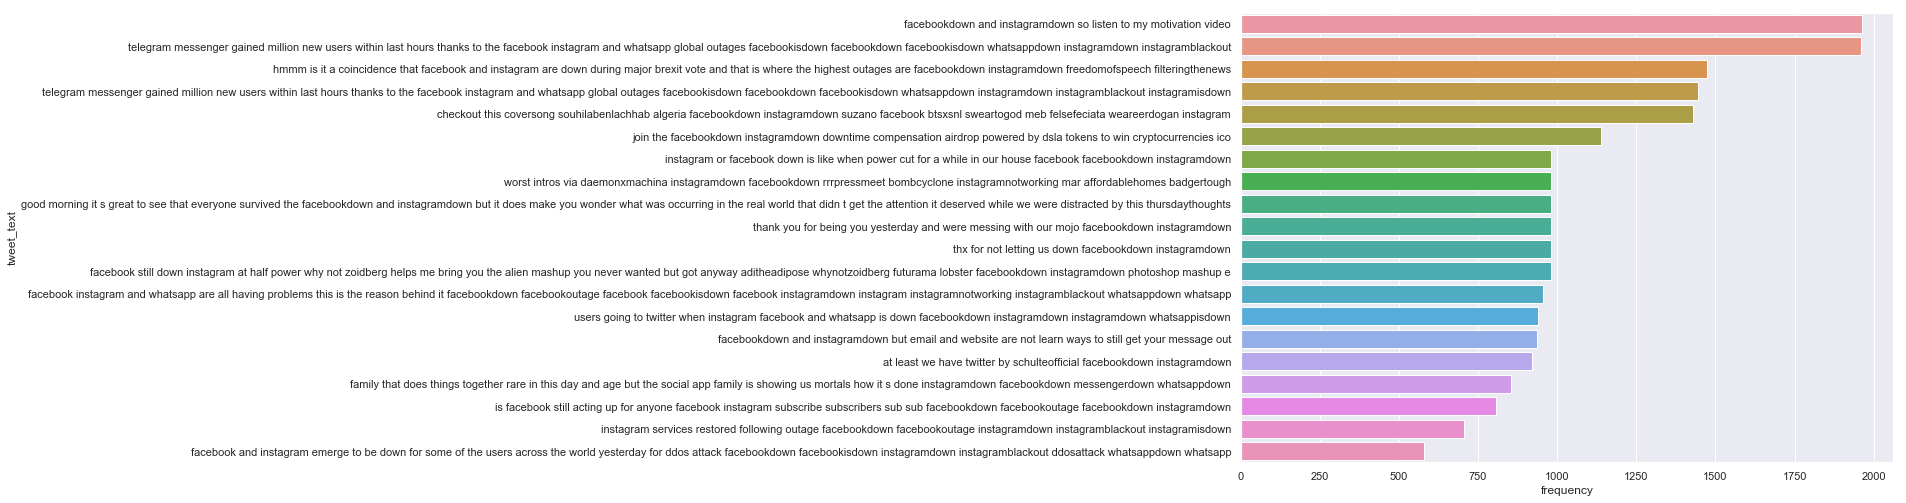

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='frequency',y='tweet_text',data=mydf.sort_values(['frequency'],ascending=False).head(20))

In [28]:
tweets_freq = mydf.copy()

In [30]:
tweets_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6521 entries, 0 to 6520
Data columns (total 2 columns):
tweet_text    6521 non-null object
frequency     6521 non-null int64
dtypes: int64(1), object(1)
memory usage: 102.0+ KB


### How about we take into consideration the number of the retweets to get a clearer look at what people felt.
### Most shared tweets will give us a better look I think of what people are reacting to the incident.

In [55]:
tweets_freq['sentiment'] = tweets_freq.apply(lambda x: TextBlob(x['tweet_text']).sentiment[0]*x['frequency'],axis=1)

In [57]:
tweets_freq

,tweet_text,frequency,sentiment
0,a bad day for facebook instagram and whatsapp ...,489,-342.300000
1,a best family must together always facebookdow...,4,4.000000
2,a compilation of memes that describe how we fe...,491,122.750000
3,a couple of garbage websites crashed today fac...,4,0.000000
4,a day without facebook is like a day without f...,490,0.000000
5,a day without fake news facebook fake news fac...,490,-245.000000
6,a day without maga russian trolls thick eyebro...,4,-1.066667
7,a day without was a day that was perfectly nor...,4,0.600000
8,a friendly reminder that while facebookdown an...,53,28.885000
9,a holiday from social media instagramdown face...,280,9.333333
